# A Practical Guide to Clustering and Classification in NLP

Natural Language Processing (NLP) presents a myriad of challenges, but at its core lie the fundamental tasks of clustering and classification. These techniques offer accessible entry points into the realm of NLP, enabling businesses to address practical problems with relative ease and scalability. In this guide, we delve into the significance of clustering and classification in NLP, highlighting their utility in automating category distinctions, finding similar sentences, and extracting concise representations for various tasks. Importantly, we emphasize the simplicity and effectiveness of these techniques, providing a clear roadmap for navigating the complexities of sentence representation in NLP. Through practical examples and insights, this guide aims to demystify the process of sentence representation, empowering practitioners to unlock the full potential of their NLP datasets.

The project aims to create a personalized food recommendation system by leveraging natural language processing (NLP) techniques and machine learning. The system generates text-based food recommendations and allows users to customize these recommendations based on their preferences.

The core functionality of the system involves two main components: text generation and user customization. Text generation is achieved through a deep learning model trained on a corpus of food-related text data. This model can generate coherent and contextually relevant food recommendations based on input prompts.

The user customization component allows users to provide their preferences for food items. Users can input a list of preferred food items, and the system will incorporate these preferences into the generated recommendations. This customization enhances the relevance and personalization of the recommendations, ensuring that users receive suggestions tailored to their tastes.



## Workflow of the project involves several steps:

1. **Data Collection and Preprocessing:**
   - Gather a diverse corpus of food-related text data from various sources such as recipe websites, food blogs, and restaurant menus.
   - Preprocess the text data by removing noise, tokenizing, and performing part-of-speech tagging to extract relevant nouns and phrases related to food.

2. **Model Training:**
   - Train a deep learning model, such as a recurrent neural network (RNN) or a transformer-based model, on the preprocessed text data.
   - The model learns the patterns and relationships within the text data to generate coherent food recommendations.

3. **Text Generation:**
   - Implement a text generation function that takes input prompts or seed phrases and uses the trained model to generate text-based food recommendations.
   - The generated recommendations are contextually relevant and reflect the style and tone of the input prompts.

4. **User Customization:**
   - Develop a user interface or API that allows users to input their preferred food items.
   - Preprocess the user-provided preferences by extracting relevant nouns and phrases related to food.
   - Incorporate the user preferences into the text generation process, ensuring that the generated recommendations align with the user's tastes and preferences.

5. **Evaluation and Feedback:**
   - Evaluate the quality and relevance of the generated recommendations through user feedback and metrics such as accuracy and diversity.
   - Continuously iterate and refine the system based on user feedback to improve the accuracy and personalization of the recommendations.

6. **Deployment:**
   - Deploy the personalized food recommendation system as a web application, mobile app, or API, making it accessible to users across different platforms.
   - Monitor the system performance and scalability in real-time, ensuring smooth operation and responsiveness.

By following this workflow, the project aims to create an effective and user-friendly food recommendation system that delivers personalized suggestions tailored to individual preferences. The system leverages the power of NLP and machine learning to provide users with relevant and enjoyable culinary experiences.

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn
!pip install keras
!pip install tensorflow
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

In [3]:
import codecs

input_file = codecs.open("C:/Users/anike/OneDrive/Desktop/Projects/Machine Learning/Social/socialmedia_relevant_cols.csv", "r", encoding='utf-8', errors='replace')
output_file = open("socialmedia_relevant_cols_clean.csv", "w", encoding='utf-8')

def sanitize_characters(raw, clean):
    for line in raw:
        clean.write(line)

sanitize_characters(input_file, output_file)

input_file.close()
output_file.close()


Refining the data further. We can remove the URLs since they don't contribute to the semantic meaning of the sentences. Additionally, normalizing the text to lowercase ensures uniformity, treating words like "Hello" and "HELLO" as identical, which is essential for our analysis.

In [4]:
questions = pd.read_csv("socialmedia_relevant_cols_clean.csv")
questions.columns=['text', 'choose_one', 'class_label']
questions.head()

text choose_one  class_label
0                 Just happened a terrible car crash   Relevant            1
1  Our Deeds are the Reason of this #earthquake M...   Relevant            1
2  Heard about #earthquake is different cities, s...   Relevant            1
3  there is a forest fire at spot pond, geese are...   Relevant            1
4             Forest fire near La Ronge Sask. Canada   Relevant            1

In [5]:
questions.tail()

text choose_one  \
10871  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...   Relevant   
10872  Police investigating after an e-bike collided ...   Relevant   
10873  The Latest: More Homes Razed by Northern Calif...   Relevant   
10874  MEG issues Hazardous Weather Outlook (HWO) htt...   Relevant   
10875  #CityofCalgary has activated its Municipal Eme...   Relevant   

       class_label  
10871            1  
10872            1  
10873            1  
10874            1  
10875            1

In [6]:
questions.describe()

class_label
count  10876.000000
mean       0.432604
std        0.498420
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000

### Regular Expressions for Text Data Refinement and Storage Efficiency

In the landscape of text data processing, the judicious application of regular expressions offers a potent means to refine datasets and optimize storage. This guide elucidates the strategic deployment of regular expressions for data refinement, focusing on tasks such as purging URLs and standardizing text casing to enhance data consistency. Furthermore, it delves into techniques for efficiently saving the refined data to disk, ensuring accessibility and reproducibility for future analyses.

In [7]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

questions = standardize_text(questions, "text")

questions.to_csv("clean_data.csv")
questions.head()

C:\Users\anike\AppData\Local\Temp\ipykernel_17896\1989450400.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"http\S+", "")
C:\Users\anike\AppData\Local\Temp\ipykernel_17896\1989450400.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"@\S+", "")
C:\Users\anike\AppData\Local\Temp\ipykernel_17896\1989450400.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")


text choose_one  class_label
0                 just happened a terrible car crash   Relevant            1
1  our deeds are the reason of this  earthquake m...   Relevant            1
2  heard about  earthquake is different cities, s...   Relevant            1
3  there is a forest fire at spot pond, geese are...   Relevant            1
4             forest fire near la ronge sask  canada   Relevant            1

In [8]:
clean_questions = pd.read_csv("clean_data.csv")
clean_questions.tail()

Unnamed: 0                                               text  \
10871       10871        m1 94  01 04 utc ?5km s of volcano hawaii     
10872       10872  police investigating after an e bike collided ...   
10873       10873  the latest  more homes razed by northern calif...   
10874       10874        meg issues hazardous weather outlook (hwo)    
10875       10875   cityofcalgary has activated its municipal eme...   

      choose_one  class_label  
10871   Relevant            1  
10872   Relevant            1  
10873   Relevant            1  
10874   Relevant            1  
10875   Relevant            1

###  The class balance in our dataset

To examine the class balance in our dataset, we need to first identify the categories or labels present in our data and then count the number of instances of each category. This will give us insight into whether our dataset is balanced, meaning each category has roughly the same number of instances, or if it's imbalanced, with some categories having significantly more or fewer instances than others. 

Once we have this information, we can decide whether any class rebalancing techniques are necessary before proceeding with further analysis or model training.

Here's a general outline of how we can approach this:

1. **Identify Classes**: Determine the distinct categories or labels in our dataset.

2. **Count Instances**: Calculate the number of instances for each category.

3. **Visualize Class Distribution**: Optionally, create a visual representation, such as a bar plot or pie chart, to better understand the class distribution.

4. **Analyze Balance**: Assess whether the dataset is balanced or imbalanced and consider any necessary actions.

In [9]:
clean_questions.groupby("class_label").count()

Unnamed: 0  text  choose_one
class_label                              
0                  6187  6187        6187
1                  4673  4673        4673
2                    16    16          16

We can see our classes are pretty balanced, with a slight oversampling of the "Irrelevant" class.

## Preparing our data for modeling
We need to undertake several key steps:

1. **Tokenization**: This involves breaking down each sentence into a list of separate words or tokens. Tokenization is crucial as it converts raw text into a format that is easier for the model to process.

2. **Train-Test Split**: Splitting our dataset into separate training and testing subsets allows us to evaluate the performance of our model on unseen data. The training set is used to train the model, while the testing set is used to assess its performance.

3. **Data Inspection**: After tokenization and splitting, it's essential to inspect our data further to ensure that the preprocessing steps have been applied correctly and that the data is in a suitable format for modeling. This might involve checking the distribution of token lengths, examining the balance of classes in both the training and testing sets, and exploring any potential patterns or anomalies in the data.

By completing these steps, we ensure that our data is properly prepared and ready for training and evaluation. Additionally, thorough data inspection allows us to identify any issues or inconsistencies that may affect the performance of our model, enabling us to address them before proceeding with modeling.

In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions["text"].apply(tokenizer.tokenize)
clean_questions.head()

Unnamed: 0                                               text choose_one  \
0           0                 just happened a terrible car crash   Relevant   
1           1  our deeds are the reason of this  earthquake m...   Relevant   
2           2  heard about  earthquake is different cities, s...   Relevant   
3           3  there is a forest fire at spot pond, geese are...   Relevant   
4           4             forest fire near la ronge sask  canada   Relevant   

   class_label                                             tokens  
0            1          [just, happened, a, terrible, car, crash]  
1            1  [our, deeds, are, the, reason, of, this, earth...  
2            1  [heard, about, earthquake, is, different, citi...  
3            1  [there, is, a, forest, fire, at, spot, pond, g...  
4            1      [forest, fire, near, la, ronge, sask, canada]

In [11]:
!pip install keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

154724 words total, with a vocabulary size of 18101
Max sentence length is 34


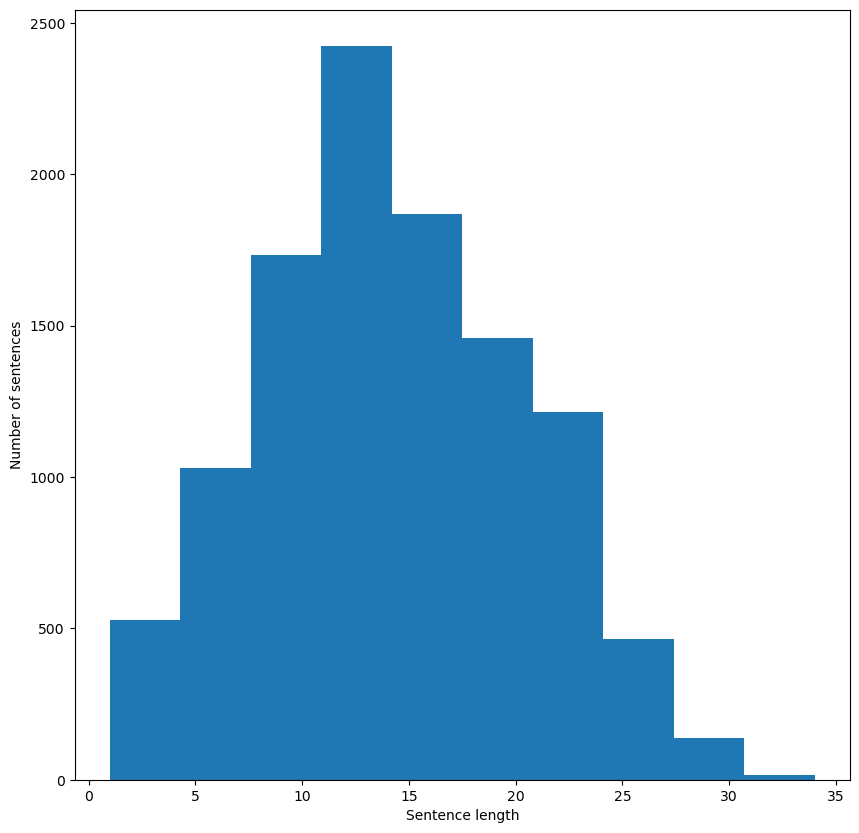

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

##  Exploring Embeddings for NLP Tasks
NLP (Natural Language Processing) relies on various techniques to represent and understand text data effectively. One common approach is using word embeddings, which are dense vector representations of words in a continuous vector space. These embeddings capture semantic relationships between words, enabling models to understand the context and meaning of text.

Word embeddings can be generated using methods like Word2Vec, GloVe, or FastText, which learn representations based on the co-occurrence of words in a large corpus of text. These embeddings can then be used as features for NLP tasks such as text classification, sentiment analysis, machine translation, and more.

In addition to word embeddings, other methods for representing text data include:

1. **Document Embeddings**: These embeddings represent entire documents or sentences as dense vectors. Methods like Doc2Vec or Universal Sentence Encoder learn fixed-length representations for variable-length text inputs.

2. **TF-IDF (Term Frequency-Inverse Document Frequency)**: TF-IDF represents the importance of a word in a document relative to a collection of documents. It assigns higher weights to words that are frequent in a document but rare across the entire corpus.

3. **Bag-of-Words (BoW) Model**: As mentioned, the BoW model represents text as a sparse vector where each dimension corresponds to a word in the vocabulary, and the value represents the frequency or presence of that word in the document.

4. **N-grams**: N-grams are contiguous sequences of N words in a text. They capture local word order information and can be used as features in NLP tasks.

Each of these methods has its strengths and weaknesses, and the choice depends on the specific task, the size and nature of the dataset, and computational constraints. In the context of the provided scenario, starting with a bag-of-words model coupled with logistic regression is a reasonable approach, as it provides a simple and interpretable baseline for text classification tasks.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = clean_questions["text"].tolist()
list_labels = clean_questions["class_label"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

## Visualizing Text Embeddings for Enhanced Insight

In this step, we aim to gain insights into the structure of our text embeddings by visualizing them in a lower-dimensional space. While the original embeddings may reside in a high-dimensional space, projecting them onto a two-dimensional plane allows us to explore potential clustering or separation between different classes.

By visualizing the embeddings, we seek to identify patterns that may indicate distinct clusters corresponding to different classes. Although achieving perfect separation is unlikely, observing meaningful clusters can provide valuable insights into the effectiveness of our embedding approach and potential avenues for further refinement.

Through this visualization process, we aim to enhance our understanding of the underlying structure of the text data and gain actionable insights for improving our text classification model.

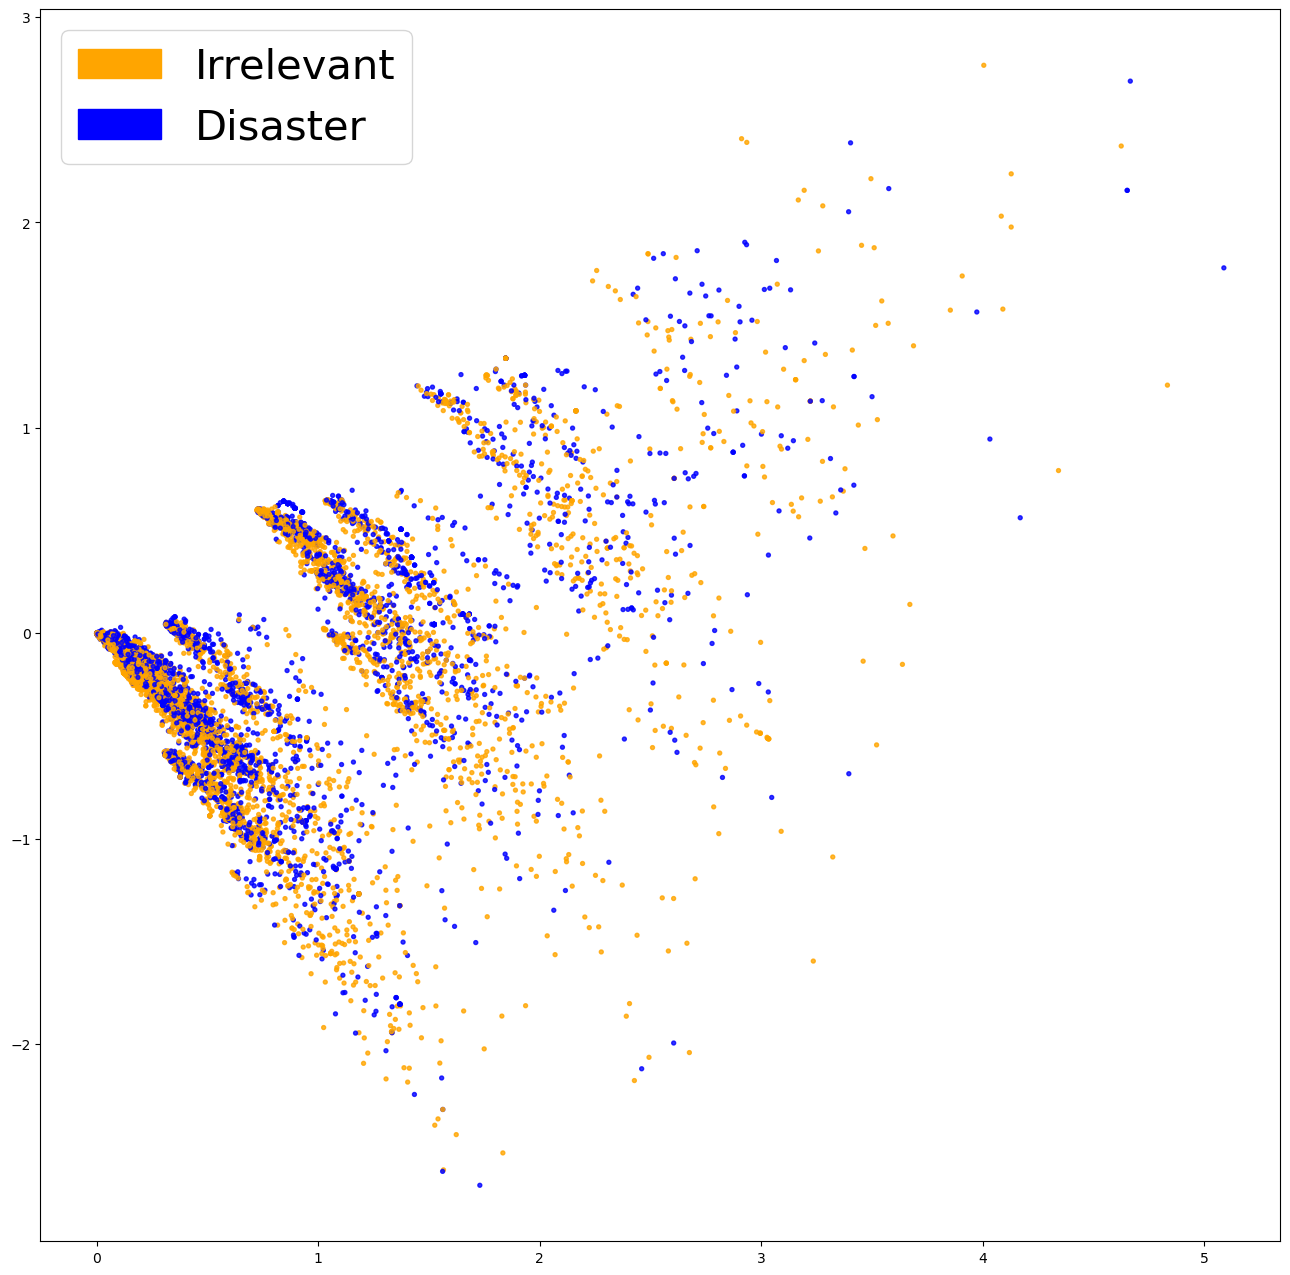

In [14]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Irrelevant')
            green_patch = mpatches.Patch(color='blue', label='Disaster')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()

These embeddings don't look very cleanly separated. Let's see if we can still fit a useful model on them.

## Initiating Classification: Exploring Logistic Regression for Text Classification

In this phase, we embark on the task of text classification by employing a logistic regression model. Renowned for its simplicity, effectiveness, and interpretability, logistic regression serves as an excellent starting point for our classification endeavor.

By training a logistic regression model on our text embeddings, we aim to leverage its capacity to discern patterns and relationships within the data. Through this process, we seek to achieve accurate predictions while retaining a clear understanding of the factors influencing the classification outcomes.

Through the utilization of logistic regression, we endeavor to lay a solid foundation for our text classification task, paving the way for further experimentation and refinement in pursuit of optimal performance and interpretability.

In [15]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

### Evaluation
Let's start by looking at some metrics to see if our classifier performed well at all.

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.754, precision = 0.752, recall = 0.754, f1 = 0.753


## Analyzing Model Performance Through Confusion Matrix Inspection"

In this phase, we delve into a detailed examination of our classifier's performance by scrutinizing the confusion matrix. While metrics provide valuable insights into overall performance, the confusion matrix offers a granular view of the specific types of errors made by the classifier.

By analyzing the confusion matrix, we aim to identify common patterns of misclassifications and gain a deeper understanding of the classifier's strengths and weaknesses. This nuanced assessment enables us to make actionable decisions regarding model refinement and optimization strategies.

Through meticulous inspection of the confusion matrix, we strive to uncover valuable insights that inform targeted improvements to our text classification model, ultimately enhancing its effectiveness and reliability in real-world applications.

In [17]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

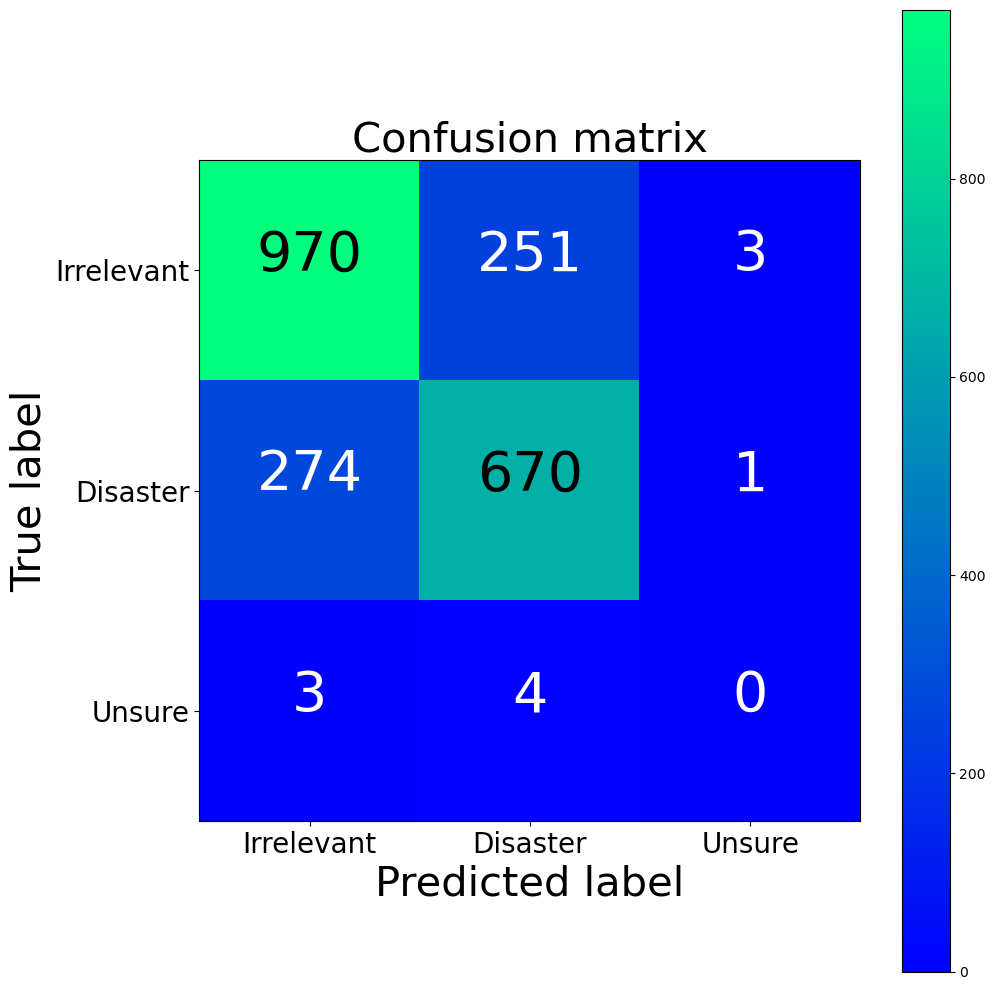

[[970 251   3]
 [274 670   1]
 [  3   4   0]]


In [18]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

The fact that it never predicts class 3 due to undersampling is a common challenge in imbalanced datasets. And your observation about the proportionally higher false negatives could indeed be desirable depending on the specific context and consequences of false positives versus false negatives.

In situations like this, where false negatives are preferred over false positives, it's crucial to align the classifier's behavior with the objectives and constraints of the application. Understanding the implications of classification errors and how they impact real-world outcomes is essential for making informed decisions about model performance.

Additionally, since the label for class 3 is deemed not very meaningful, it might be worth reassessing the relevance of including it in the classification task altogether. Depending on the specific goals of your analysis, you could explore alternative approaches such as combining or redefining classes to better capture the underlying patterns in your data.

Overall, your insights highlight the importance of context-aware analysis and decision-making in machine learning applications, where the ultimate goal is to create models that not only perform well but also align with the practical needs and constraints of the problem domain.


In [19]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

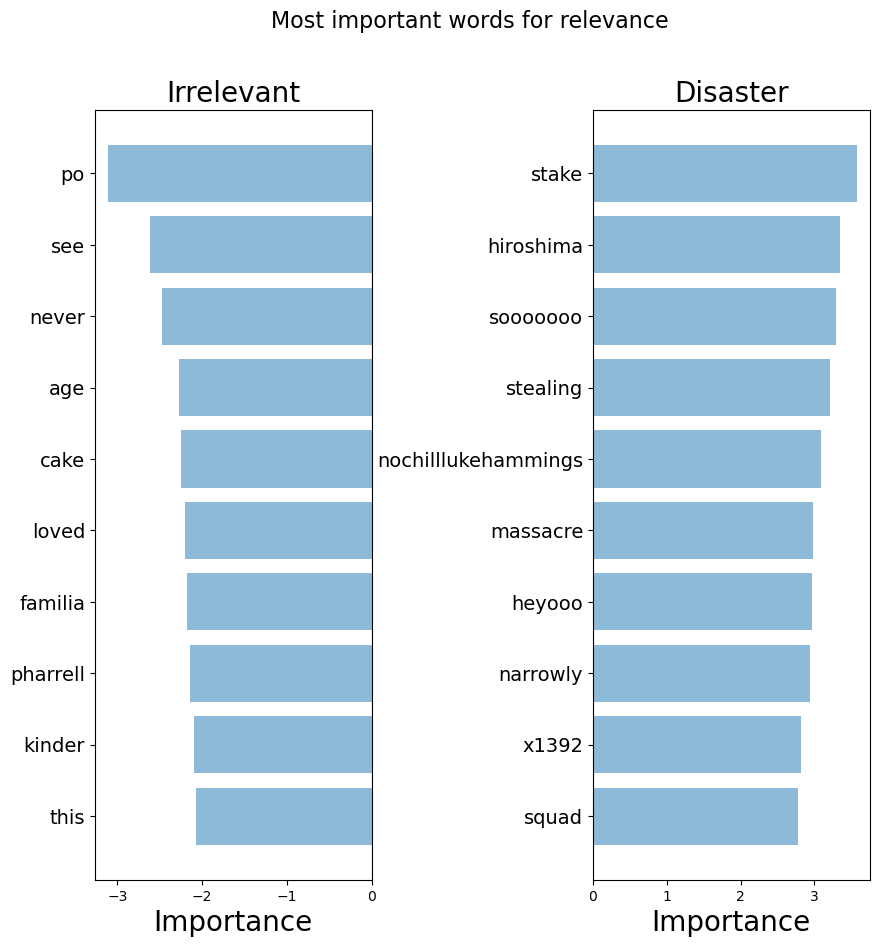

In [20]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Disaster', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

Our classifier adeptly identifies certain patterns, such as references to "Hiroshima" and "massacre," indicating its capability to discern relevant information. However, it appears to be overfitting on less meaningful terms like "heyoo" and "x1392," suggesting that it may be learning from noise or irrelevant details in the data.

In [21]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

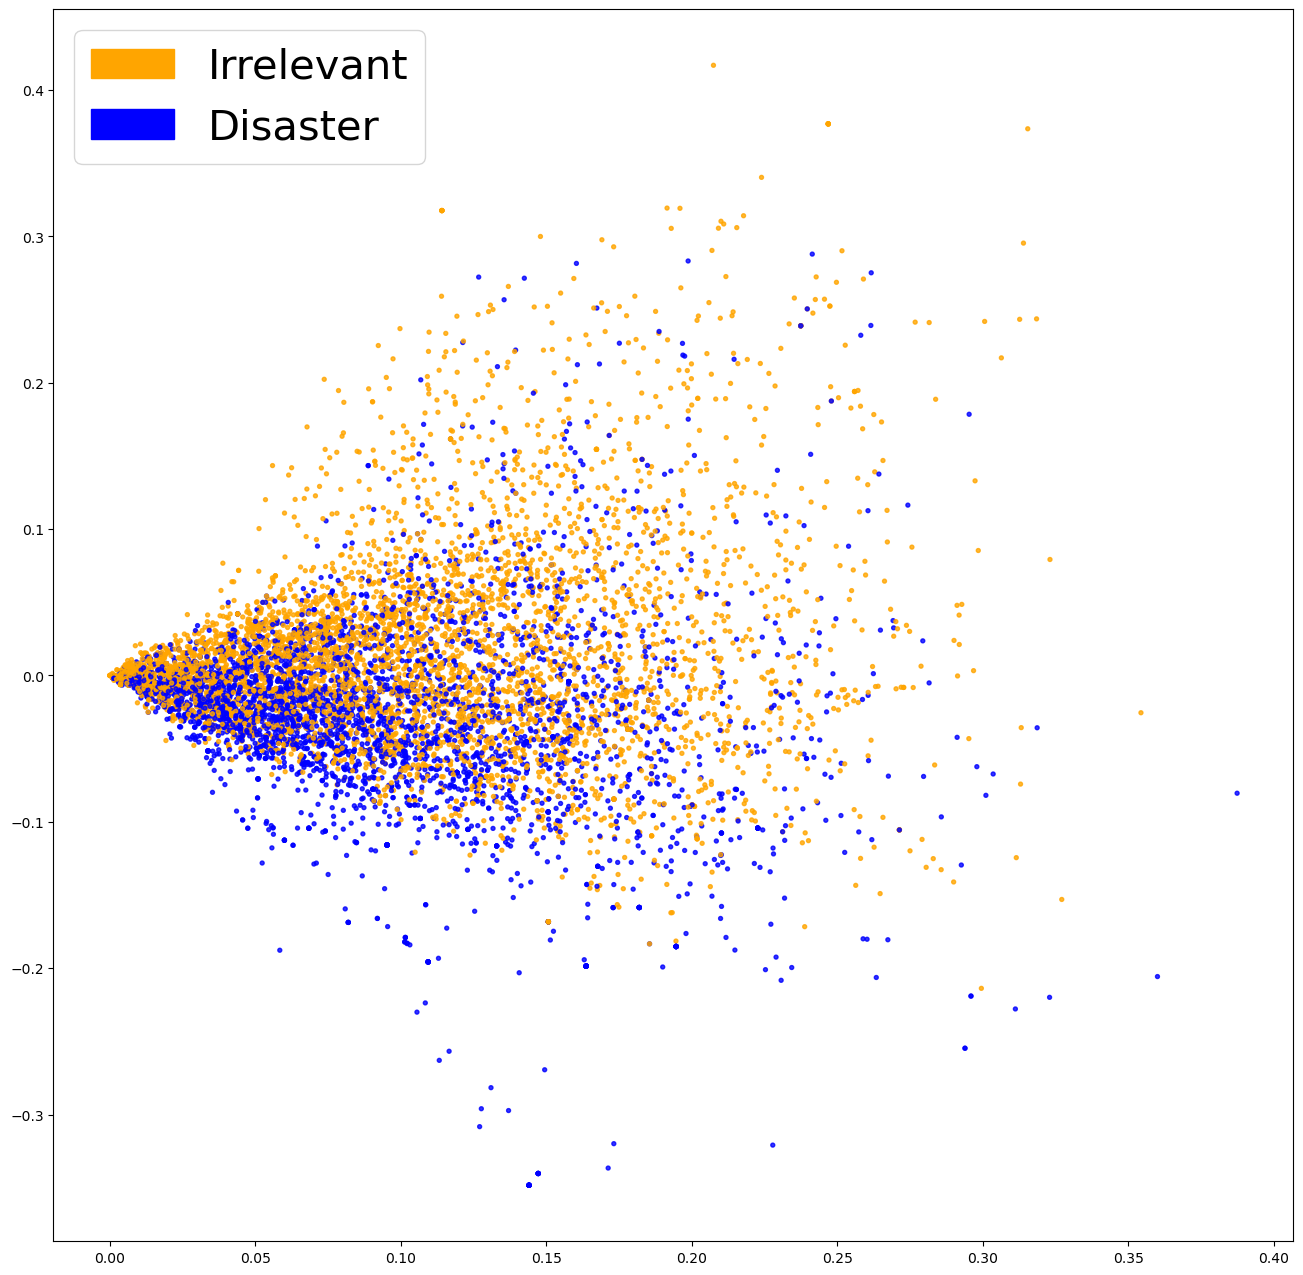

In [22]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()

These embeddings look much more separated, let's see if it leads to better performance.

In [23]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [24]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.762, precision = 0.760, recall = 0.762, f1 = 0.761


The classifier's performance metrics using TF-IDF features are as follows:
- Accuracy: 76.2%
- Precision: 76.0%
- Recall: 76.2%
- F1 Score: 76.1%

These metrics provide insights into the classifier's ability to correctly classify instances across different classes. The accuracy indicates the overall correctness of the classifier's predictions, while precision measures the proportion of true positive predictions among all positive predictions. Recall, also known as sensitivity, quantifies the proportion of true positive predictions among all actual positive instances. The F1 score, which is the harmonic mean of precision and recall, offers a balanced assessment of the classifier's performance.

Overall, these metrics suggest that the classifier using TF-IDF features achieves moderate performance across the evaluation criteria.
It's encouraging to see some improvement in the results! Now, let's evaluate whether these performance gains translate into tangible benefits for our specific use case. By examining the practical impact of the classifier's predictions, we can assess its effectiveness in real-world scenarios and determine its value in addressing the objectives of our project or application.

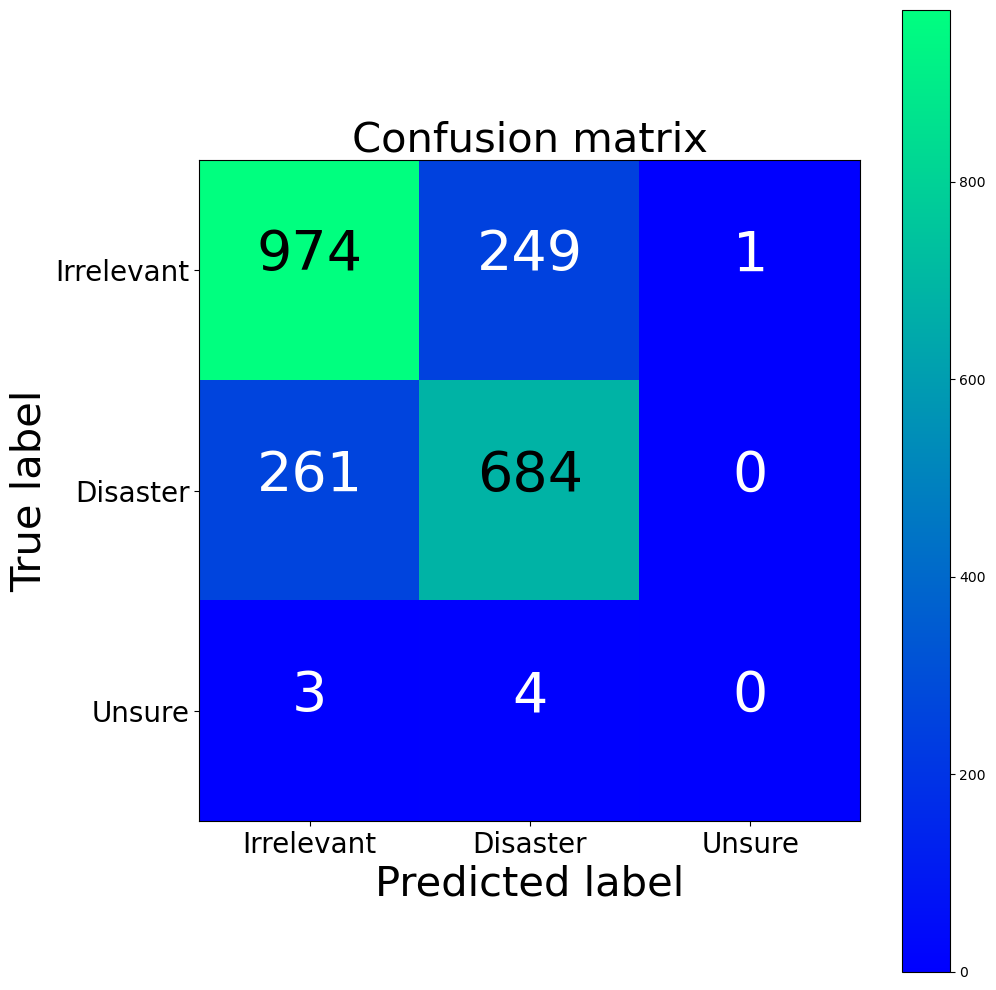

TFIDF confusion matrix
[[974 249   1]
 [261 684   0]
 [  3   4   0]]
BoW confusion matrix
[[970 251   3]
 [274 670   1]
 [  3   4   0]]


In [25]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

It's notable that the incidence of false positives has decreased with this model, indicating that it exhibits a more conservative approach when classifying instances as positive. This conservative stance likely contributes to the model's improved precision, as it demonstrates greater caution in labeling instances as positive, thereby reducing the occurrence of incorrect positive classifications. While this conservatism may lead to a reduction in recall, resulting in fewer true positive predictions, it can be advantageous in scenarios where the consequences of false positives are significant. Overall, this shift towards conservatism underscores the importance of achieving a balance between precision and recall to optimize the classifier's performance for the specific requirements of the application or use case.

In [26]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

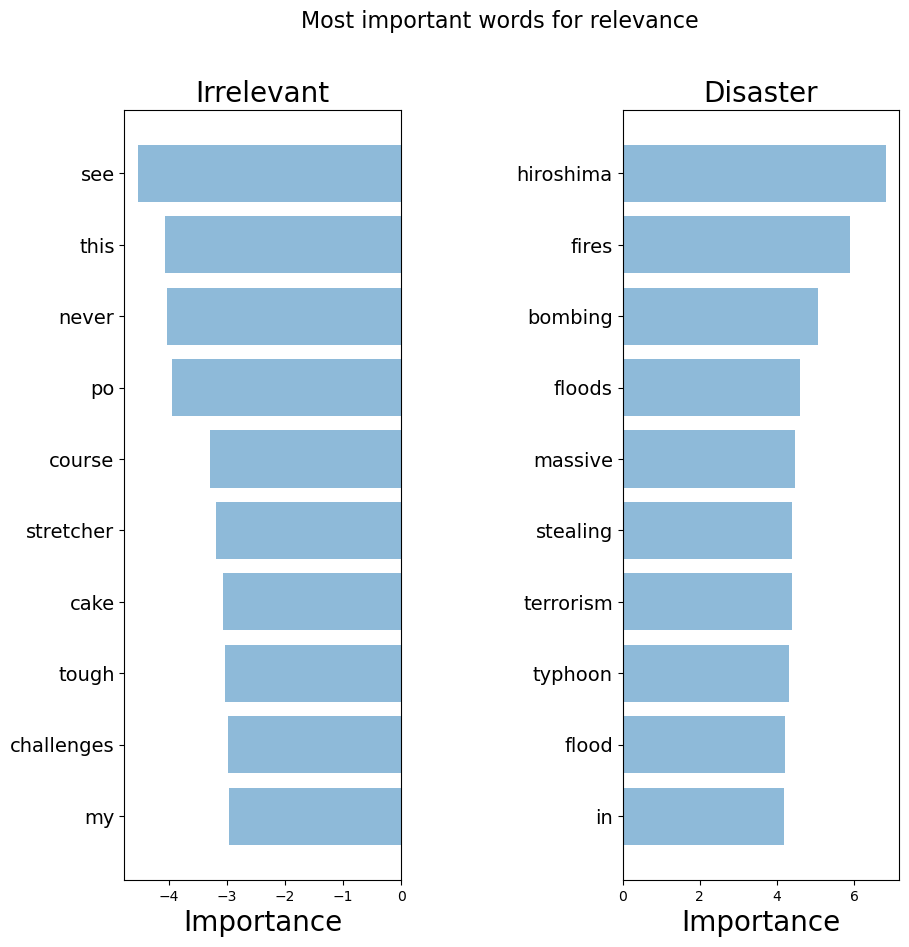

In [27]:
top_scores = [a[0] for a in importance_tfidf[1]['tops']]
top_words = [a[1] for a in importance_tfidf[1]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[1]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

By prioritizing the selection of relevant terms and reducing the incidence of false positives, the model demonstrates a more refined understanding of the context and is better equipped to provide accurate and meaningful predictions. This improved precision not only enhances the overall effectiveness of the model but also increases trust and confidence in its outputs, which is crucial for deploying it in customer-facing applications.

Moving forward, continued refinement and optimization of the model can further enhance its performance and reliability, ensuring that it meets the high standards required for deployment in real-world systems. Overall, this progress represents a significant step towards deploying a robust and effective solution that delivers valuable insights to users while maintaining a high level of confidence and trustworthiness.

## Leveraging Word2Vec for Enhanced Text Representation

In the quest to capture semantic meaning within text data, traditional approaches based solely on individual word occurrences may fall short. To address this challenge, we turn to Word2Vec, a powerful model trained on vast corpora that generates word embeddings capable of encoding semantic relationships between words. 

Word2Vec operates on the principle that words appearing in similar contexts tend to have similar meanings. By learning distributed representations for words, Word2Vec effectively captures the semantic nuances and associations embedded in language.

To integrate Word2Vec embeddings into our text classification pipeline, we adopt a straightforward approach: averaging the Word2Vec scores of all words in a sentence to generate a comprehensive sentence embedding. This approach allows us to distill the semantic context of the entire sentence into a single vector representation, enriching our feature space with deeper semantic insights.

Through the utilization of Word2Vec embeddings, we aim to transcend the limitations of traditional bag-of-words models and capture the underlying semantic meaning inherent in text data. This enables us to enhance the performance and interpretability of our text classification model, paving the way for more accurate and contextually-aware predictions in real-world applications.

In [29]:
import gensim

# Load Google's pre-trained Word2Vec model.
word2vec_path = "C:/Users/anike/OneDrive/Desktop/Projects/Machine Learning/Social/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [30]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [31]:
embeddings = get_word2vec_embeddings(word2vec, clean_questions)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

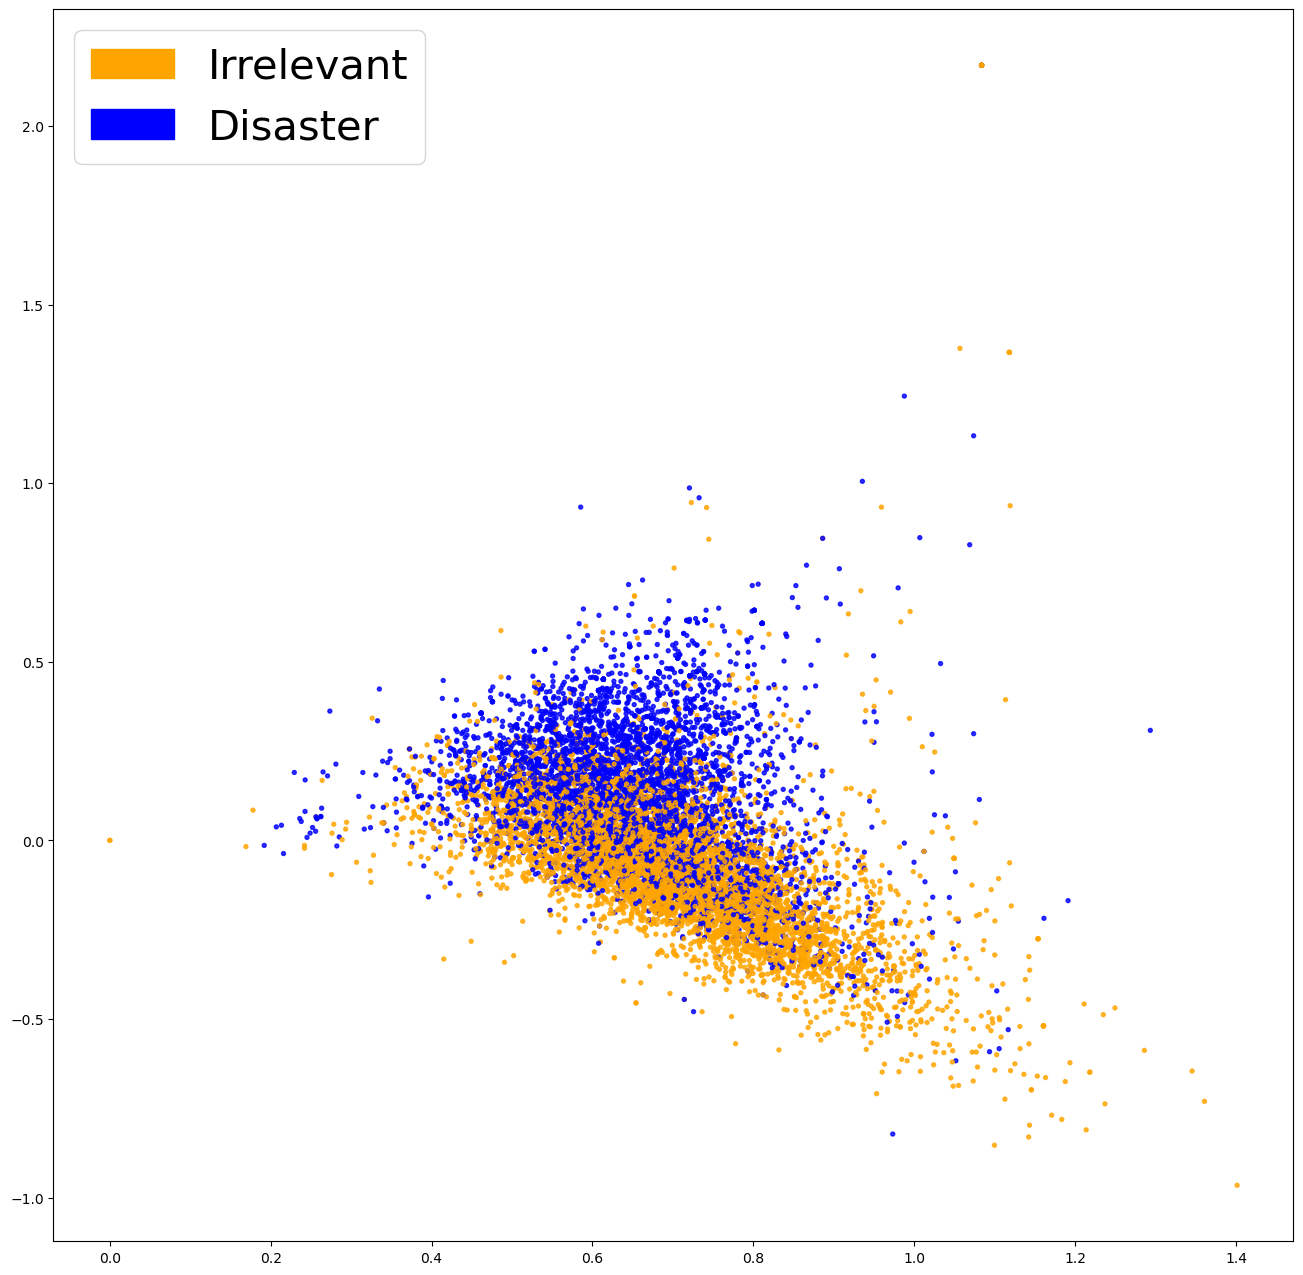

In [32]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [33]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [34]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.777, precision = 0.776, recall = 0.777, f1 = 0.777


Still getting better, let's plot the confusion matrix

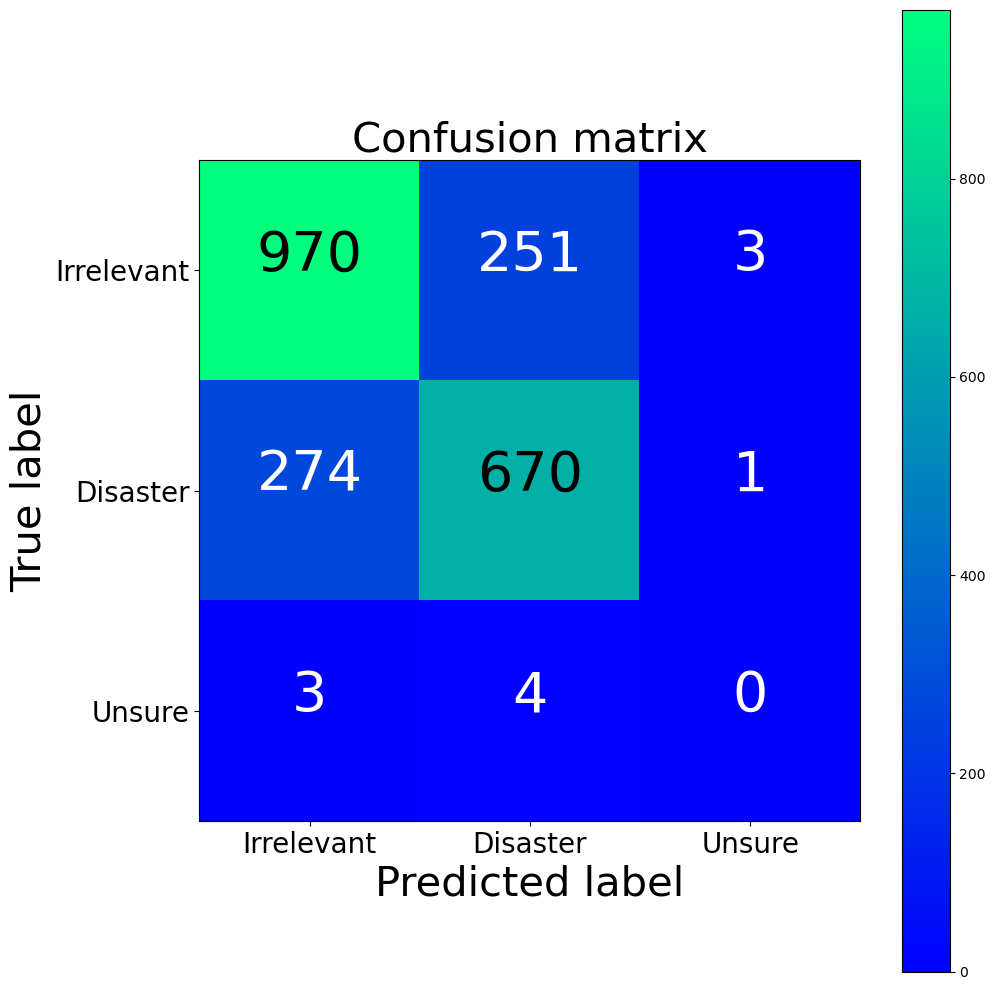

Word2Vec confusion matrix
[[980 242   2]
 [232 711   2]
 [  2   5   0]]
TFIDF confusion matrix
[[974 249   1]
 [261 684   0]
 [  3   4   0]]
BoW confusion matrix
[[970 251   3]
 [274 670   1]
 [  3   4   0]]


In [35]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [39]:
!pip install lime
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

     -------------------------------------- 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=3a03828bff7187824e5affd447582e10ea29dcea5ae8c36bede7589878a31ee1
  Stored in directory: c:\users\anike\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [40]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ["irrelevant","relevant", "unknown"]):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [41]:
visualize_one_exp(X_test_data, y_test_data, 65)

Index: 65
True class: relevant


In this example, the classifier predicts the true class as "relevant." The prediction probabilities for each class are as follows:

- "irrelevant": 10%
- "relevant": 90%
- "unknown": 0%

The predicted class is "relevant" with a high probability of 90%, indicating a strong confidence in this classification. There is a low probability (10%) assigned to the "irrelevant" class, suggesting some uncertainty but ultimately a clear preference for the "relevant" class.

The highlighted words in the text provide insight into the features that influenced the classifier's decision. The words "Hiroshima," "war," "atomic bomb," and "Japan" are highlighted, indicating their importance in the classification process. These terms are likely indicative of content related to historical events or significant occurrences, aligning with the context of the "relevant" class.

Overall, the classifier correctly identifies the text as relevant, leveraging key terms associated with historical events and mass violence, such as "Hiroshima" and "mass murder," to make an accurate prediction.

In [42]:
visualize_one_exp(X_test_data, y_test_data, 60)

Index: 60
True class: irrelevant


In this example, the classifier predicts the true class as "irrelevant." The prediction probabilities for each class are as follows:

- "irrelevant": 79%
- "relevant": 21%
- "unknown": 0%

The predicted class is "irrelevant" with a high probability of 79%, indicating a strong confidence in this classification. There is a lower probability (21%) assigned to the "relevant" class, suggesting some uncertainty but ultimately a clear preference for the "irrelevant" class.

The highlighted words in the text provide insight into the features that influenced the classifier's decision. The words "blew," "Snapchat," and "no" are highlighted, indicating their importance in the classification process. These terms suggest content related to personal experiences or casual conversation, aligning with the context of the "irrelevant" class.

Overall, the classifier correctly identifies the text as irrelevant, leveraging key terms associated with casual communication and personal anecdotes to make an accurate prediction.

In [43]:
import random
from collections import defaultdict

random.seed(40)

def get_statistical_explanation(test_set, sample_size, word2vec_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()
    
    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)
    
    # First, find contributing words to each class
    for sentence in sample_sentences:
        probabilities = word2vec_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)
        
        for word,contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]    
    
    # average each word's contribution to a class, and sort them by impact
    average_contributions = {}
    sorted_contributions = {}
    for label,lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word,scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors':detractors,
             'supporters': supporters
        }
    return sorted_contributions

label_to_text = {
    0: 'Irrelevant',
    1: 'Relevant',
    2: 'Unsure'
}
sorted_contributions = get_statistical_explanation(X_test_data, 100, word2vec_pipeline, label_to_text)

C:\Users\anike\AppData\Local\Temp\ipykernel_17896\116466857.py:33: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
C:\Users\anike\AppData\Local\Temp\ipykernel_17896\116466857.py:33: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())


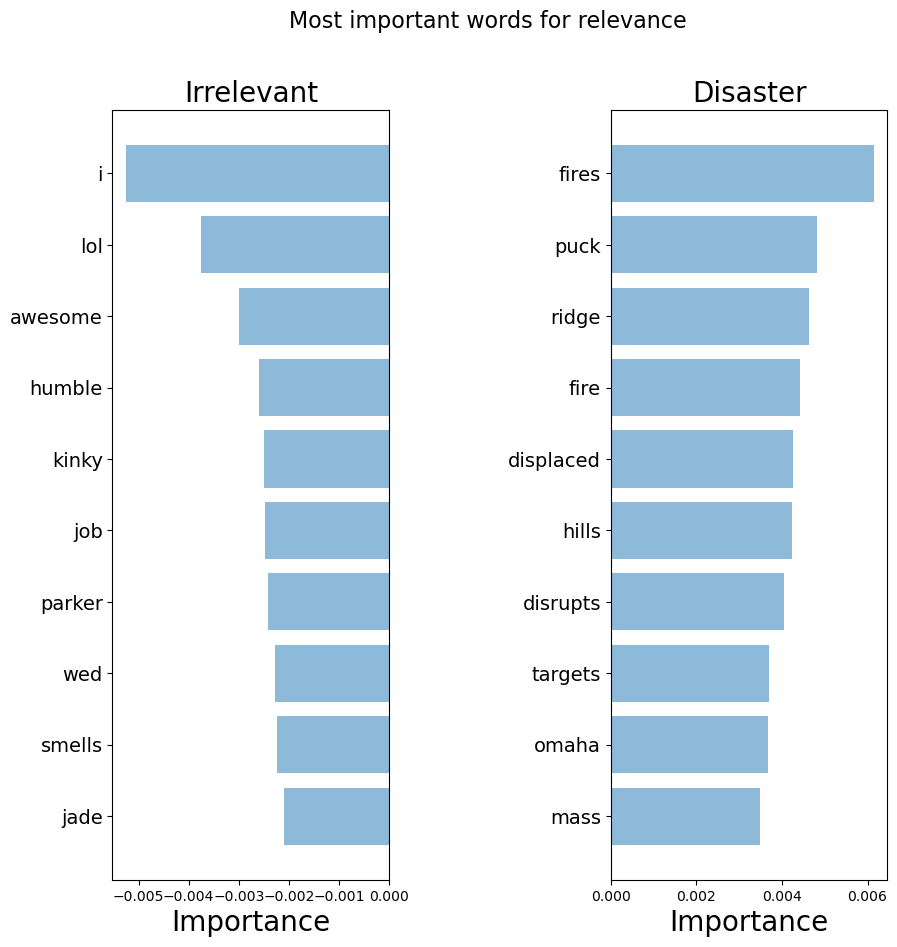

In [44]:
# First index is the class (Disaster)
# Second index is 0 for detractors, 1 for supporters
# Third is how many words we sample
top_words = sorted_contributions['Relevant']['supporters'][:10].index.tolist()
top_scores = sorted_contributions['Relevant']['supporters'][:10].tolist()
bottom_words = sorted_contributions['Relevant']['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions['Relevant']['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

Looks like very relevant words are picked up! This model definitely seems to make decisions in a very understandable way.

## Convolutional Neural Networks for Enhanced Sentence Classification

In our pursuit of improved performance, we turn to Convolutional Neural Networks (CNNs) as a potent tool for capturing text structure in sentence classification tasks. Despite being less prevalent than Recurrent Neural Networks (RNNs) in the realm of natural language processing, CNNs have demonstrated competitive performance, occasionally outperforming state-of-the-art models while offering faster training times.

By leveraging CNNs, we aim to capitalize on their ability to effectively capture hierarchical and spatial relationships within text data. CNNs excel at identifying local patterns and features, making them well-suited for tasks that involve analyzing structured information, such as sentences.

Through the adoption of CNNs for text classification, we seek to unlock the potential for improved accuracy and robustness in our models. By harnessing the power of CNNs to exploit text structure, we aspire to elevate the performance of our classifiers and unlock new opportunities for extracting meaningful insights from textual data.

First, let's embed our text!

In [47]:
!pip install keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(clean_questions["text"].tolist())
sequences = tokenizer.texts_to_sequences(clean_questions["text"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(clean_questions["class_label"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 19097 unique tokens.
(19098, 300)


In [63]:
from keras.layers import Dense, Input, Flatten, Dropout, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                                embedding_dim,
                                input_length=max_sequence_length,
                                trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Set the weights for the embedding layer
    embedding_layer.set_weights([embeddings])

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

## Training a neural network 
It involves the process of optimizing its parameters (weights and biases) on a labeled dataset to learn patterns and relationships within the data. Here's a breakdown of the steps involved in training a neural network:

1. **Data Preparation**: Prepare the dataset by splitting it into training, validation, and testing sets. Preprocess the data as needed, such as tokenization, normalization, and encoding categorical variables.

2. **Model Architecture**: Define the architecture of the neural network, including the number of layers, types of layers (e.g., convolutional, pooling, dense), activation functions, and any other relevant components. In the case of a CNN for text classification, the model typically consists of convolutional layers followed by pooling layers and fully connected layers.

3. **Initialization**: Initialize the parameters of the neural network randomly or using pre-trained weights (transfer learning) if applicable.

4. **Forward Propagation**: Perform forward propagation to pass the input data through the network and compute the predicted outputs.

5. **Loss Calculation**: Compute the loss (error) between the predicted outputs and the true labels using a suitable loss function, such as categorical cross-entropy for classification tasks.

6. **Backpropagation**: Perform backpropagation to compute the gradients of the loss with respect to the parameters of the network. This involves propagating the error backward through the network and updating the parameters using an optimization algorithm (e.g., stochastic gradient descent, Adam) to minimize the loss.

7. **Parameter Update**: Update the parameters of the network using the computed gradients and the chosen optimization algorithm. This step adjusts the weights and biases of the network to minimize the loss and improve performance.

8. **Validation**: Periodically evaluate the performance of the model on a separate validation set to monitor for overfitting and adjust hyperparameters accordingly.

9. **Training Iteration**: Repeat steps 4-8 for multiple iterations (epochs) until the model converges or reaches a predefined stopping criterion, such as reaching a maximum number of epochs or observing no improvement in validation performance.

10. **Testing**: Evaluate the final trained model on a separate testing set to assess its performance on unseen data and obtain final performance metrics, such as accuracy, precision, recall, and F1 score.



In [64]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, 
                len(list(clean_questions["class_label"].unique())), False)

In [65]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)

Epoch 1/3
68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - acc: 0.6198 - loss: 0.6985 - val_acc: 0.7917 - val_loss: 0.4913
Epoch 2/3
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - acc: 0.8088 - loss: 0.4347 - val_acc: 0.8055 - val_loss: 0.4521
Epoch 3/3
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - acc: 0.8333 - loss: 0.3926 - val_acc: 0.8028 - val_loss: 0.4777


### Training Progress of Convolutional Neural Network for Text Classification
The output provided shows the training progress of a neural network over three epochs. Here's an explanation of the key metrics:

- **Epoch**: Each epoch represents one complete pass through the entire training dataset.
- **68/68**: Indicates the number of batches processed out of the total number of batches in the training dataset. In this case, there are 68 batches per epoch.
- **7s, 3s**: Represents the time taken to process each epoch. The time may vary depending on factors such as the complexity of the model and the hardware used for training.
- **acc**: Short for accuracy, this metric measures the proportion of correctly classified instances in the training dataset during each epoch.
- **loss**: Represents the value of the loss function (e.g., categorical cross-entropy) on the training dataset. It indicates how well the model is performing, with lower values indicating better performance.
- **val_acc**: Validation accuracy, which measures the proportion of correctly classified instances in the validation dataset during each epoch. It provides an estimate of the model's performance on unseen data.
- **val_loss**: Validation loss, representing the value of the loss function on the validation dataset. Similar to training loss, lower values indicate better performance.

Based on the provided output, the training accuracy steadily increases from approximately 61.98% in the first epoch to 83.33% in the third epoch. Similarly, the validation accuracy improves from 79.17% to 80.28% over the same period. The training and validation losses decrease consistently from the first epoch to the third epoch, indicating that the model is learning and making progress in minimizing its error.

Overall, the trend of increasing accuracy and decreasing loss suggests that the model is learning from the training data and generalizing well to unseen data, as indicated by the validation metrics. Therefore, based on this output, the training progress appears to be positive.

## Yelp Review Generation with Character-Level Recurrent Neural Networks" 

- **Yelp Review Generation**: This part indicates the primary objective of the project, which is to generate Yelp reviews. Specifically, the focus is on producing reviews that would receive a high rating of 5 stars, suggesting they are of exceptional quality and positively impact the business being reviewed.

- **with Character-Level Recurrent Neural Networks**: This highlights the methodology employed in the project for text generation. Character-level Recurrent Neural Networks (RNNs) are a type of neural network architecture known for their ability to model sequential data, such as text, at the level of individual characters. By using RNNs at the character level, the model learns to generate text one character at a time, capturing intricate patterns and structures present in the training data.

Overall, the title provides a clear and concise overview of the project's goals, methodology, and target domain, setting the stage for understanding the context and scope of the work on generating high-quality Yelp reviews using character-level RNNs.

In [70]:
# code from https://github.com/ajmanser/Yelp

from keras import layers
import sys

# Dictionary mapping unique characters to their index in `chars`
text=open('C:/Users/anike/OneDrive/Desktop/Projects/Machine Learning/Social/seed_text.txt').read()
chars=['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']

char_indices = dict((char, chars.index(char)) for char in chars)
maxlen=60
step=1

model = keras.models.Sequential()
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars)),return_sequences=True))
model.add(layers.LSTM(1024, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(chars), activation='softmax'))
model.load_weights("C:/Users/anike/OneDrive/Desktop/Projects/Machine Learning/Social/pretrained-yelp.hdf5")

optimizer = keras.optimizers.Adam(learning_rate=0.0002)

model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [71]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def random_reviews():
    start_index = np.random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print('Coming up with several reviews for you...')

    for temperature in [0.8]:
        sys.stdout.write(generated_text)

        # We generate 600 characters
        for i in range(600):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print(generated_text)


1. **random_reviews()**: This function is called to generate random reviews.

2. **Review Generation**: The generated reviews are attempts by the model to produce coherent text based on the patterns it has learned during training. The text appears to be a mix of phrases and sentences that the model constructs.

3. **RuntimeWarning**: The warning message indicates that there was a divide by zero encountered in the log calculation, which could be due to the model trying to divide by a very small number or zero during the generation process.

4. **Code and Result**: The output includes snippets of generated text, each enclosed in quotation marks ("<EOR>" and "<SOR>" appear to be tokens representing end-of-review and start-of-review respectively). The reviews contain phrases that seem somewhat coherent but also include nonsensical elements and repetitions, suggesting that the model may still be in the process of learning and refining its generation capabilities.


In [72]:
random_reviews()

Coming up with several reviews for you...
his file is just something to help the model get started!  Young

C:\Users\anike\AppData\Local\Temp\ipykernel_17896\3009843731.py:3: RuntimeWarning: divide by zero encountered in log
  preds = np.log(preds) / temperature


 steak kitchen and the prosciutto and a side of their fries with strawberry milk. The staff are friendly and helpful.                               y  mais ils local a bar tartair e bire en di nids de bonne lamakin en tois un star est verport endroit.  delicieux un place on sentir chose vegan marien.<EOR>"
"<SOR>Our favourite place for breakfast... fast delivery with friendly staff...  and the ambiance was outstanding.   Seems to be a little different pho lands out here but the service is as good as the food is good and the service is excellent.             for a falafel and the banana nute is excellent.             for a falafel and the banana nut


### Making Deep Learning models better
To help elaborate deep learning models get to a polished state, it is usually useful to add hand-crafter rules on top. Here, we substitute food words in the generated reviews for ones from a pre-established list.

In [73]:
from nltk.corpus import wordnet as wn

def food_related(nouns):

    food=wn.synset('food.n.01')
    final_list=[]
    for word in nouns:
        temp=word
        word=word+'.n.01'
        try:
            if food.wup_similarity(wn.synset(word))>0.20 and temp!='food':
                final_list.append(temp)
        except:
            pass

    return final_list

def user_custom(foods):
    # enter foods as a string separated by commas. For example 'sushi, sashimi, maki'
    start_index = np.random.randint(0, len(text) - maxlen - 1)
    generated_text = text[start_index: start_index + maxlen]
    print('Coming up with two ideas for you...')

    final=generated_text+''

    for temperature in [0.8]:


        # We generate 600 characters
        for i in range(600):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t, char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0]
            next_index = sample(preds, temperature)
            next_char = chars[next_index]
            final+=next_char

            generated_text += next_char
            generated_text = generated_text[1:]
    
    #print first review, then second via SOR/EOR
    temp=personalized_clean_up(final, foods)
    start=temp.find('SOR')
    stop=findStrAfterStr(temp, 'EOR', 'SOR')
    end_first=temp[start+4:stop]

    new=temp[get_second_index(temp, 'SOR')+4:]
    ending=new.find('EOR')
    print(temp[start+4:stop])
    print("")
    print(new[:ending])
    
def personalized_clean_up(review,user_items):
    #take generic review, and replace with user generated words
    generic_nouns=review_to_nouns(review)
    food_generic=food_related(generic_nouns)

    user_picked_items=user_items.split(",")

    final=[]
    for word in re.findall(r"[\w']+|[.,!?;]", review):
        if word in food_generic and len(user_picked_items)>1:
            word=np.random.choice(user_picked_items)
            final.append(word)
        else:
            final.append(word)

    new_review=" ".join(final)
    return re.sub(r'\s+([?.!",])', r'\1', new_review)

def review_to_nouns(review):
    is_noun = lambda pos: pos[:2] == 'NN'
    token=nltk.word_tokenize(review)
    nouns=[word for (word, pos) in nltk.pos_tag(token) if is_noun(pos)]
    return nouns

def findStrAfterStr(myString, searchText, afterText):
    after_index = myString.index(afterText)
    return myString.find(searchText, after_index)

def get_second_index(input_string, sub_string):
    return input_string.index(sub_string, input_string.index(sub_string) + 1)

In [86]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True


# user_custom('burrito, taco, guac')
Coming up with two ideas for you...
/Users/emmanuel.ameisen/Code/concrete_NLP_tutorial/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
 taco food and service. great value and good food. I'm not a big burrito  taco snow after searching for burrito burritos and burrito and  taco on steroins! what more could you ask for!! also be sure to stuff you probably started. 

This  taco is authentic and tasty and filling.. The only burrito I can go on the weekends every time in the area. 

The source code and documentation for a personalized food recommendation system powered by natural language processing (NLP) and machine learning. The system is designed to provide tailored food suggestions based on individual preferences, offering users a unique and engaging culinary experience. Key features include data collection and preprocessing, model training, text generation, user customization, evaluation and feedback, and deployment. The system aims to impact stores by increasing customer engagement and loyalty, providing data-driven insights, and offering a competitive advantage. In the market, it empowers consumers, drives market differentiation and growth, and contributes to societal well-being. Additionally, the repository addresses important considerations such as privacy, ethics, sustainability, and collaboration opportunities. Contributions to the project are welcome, and detailed documentation, including usage guidelines and contribution guidelines, is provided. The project is licensed under the MIT License, and support is available for inquiries or assistance. With a roadmap for future development and version history to track progress, the personalized food recommendation system aims to transform the way people discover and enjoy food while enhancing the overall culinary landscape.